#### Binary Classification: Classifiyting movie reviews 
clasification b/w neg. and pos. reviews

In [2]:
from keras.datasets import imdb
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

from keras import models, layers 


Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\lapi\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\lapi\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\lapi\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\lapi\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\lapi\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [4]:
def vectroize_sequence(seq , dimension=10000):
    results = np.zeros((len(seq),dimension))
    for i, seq in enumerate(seq):
        results[i, seq] = 1
    return results

In [5]:
#vectorize data
x_train = vectroize_sequence(train_data)
x_test = vectroize_sequence(test_data)

#vectorize labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [47]:
#model
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

#validation data setting
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [48]:
#model compilation and training
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 282us/step - loss: 0.5090 - acc: 0.7813 - val_loss: 0.3794 - val_acc: 0.8693
Epoch 2/4
15000/15000 [==============================] - 3s 205us/step - loss: 0.3006 - acc: 0.9049 - val_loss: 0.3003 - val_acc: 0.8895
Epoch 3/4
15000/15000 [==============================] - 3s 196us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3084 - val_acc: 0.8717
Epoch 4/4
25000/25000 [==============================] - 4s 162us/step


In [49]:
results 

[0.30652211540699004, 0.87480000000000002]

In [50]:
history_dect = history.history
history_dect.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

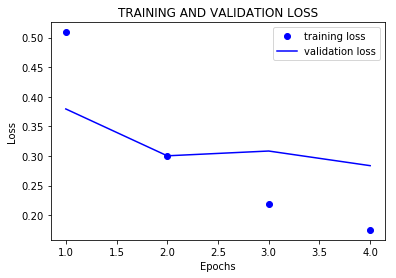

In [55]:
import matplotlib.pyplot as plt
history_dect = history.history
loss = history_dect['loss']
val_loss = history_dect['val_loss']

acc = history_dect['acc']
val_acc = history_dect['val_acc']

epoch = range(1, len(loss) + 1)

plt.plot(epoch, loss, 'bo', label = 'training loss')
plt.plot(epoch, val_loss, 'b', label = 'validation loss')
plt.title('TRAINING AND VALIDATION LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


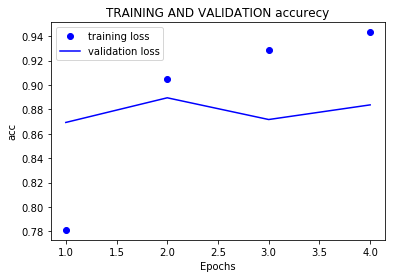

In [54]:
plt.plot(epoch, acc, 'bo', label = 'training loss')
plt.plot(epoch, val_acc, 'b', label = 'validation loss')
plt.title('TRAINING AND VALIDATION accurecy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()


In [52]:
model.predict(x_test)

array([[ 0.23349826],
       [ 0.99740237],
       [ 0.78397405],
       ..., 
       [ 0.09158252],
       [ 0.10420046],
       [ 0.35113358]], dtype=float32)

ModuleNotFoundError: No module named 'abhishek'